<a href="https://colab.research.google.com/github/TanishDevX/License-Plate-Recognition-/blob/main/ALPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🔧 STEP 1: INSTALL DEPENDENCIES
# -------------------------------
!pip install ultralytics --upgrade
!pip install paddleocr
!apt-get install -y libgl1-mesa-glx

print("✅ YOLOv11 & PaddleOCR Installed!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 767.5/767.5 kB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 143.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 125.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.

In [ ]:
# ============================================================
# 📌 STEP 2: SET DATASET PATH IN DRIVE


DATASET_PATH = "/content/drive/MyDrive/Dataset"

import os
if not os.path.exists(DATASET_PATH):
    raise Exception("❌ Dataset path incorrect. Check your folder path in Drive.")

print("📁 Dataset found at:", DATASET_PATH)


📁 Dataset found at: /content/drive/MyDrive/Dataset


In [ ]:
# ============================================================
# 🔍 STEP 3: Locate data.yaml inside dataset
# ============================================================
yaml_path = None

for root, dirs, files in os.walk(DATASET_PATH):
    if "data.yaml" in files:
        yaml_path = os.path.join(root, "data.yaml")
        break

if yaml_path is None:
    raise Exception("❌ data.yaml NOT FOUND! Make sure dataset is YOLOv11 formatted.")

print("📌 YAML Found at:", yaml_path)

📌 YAML Found at: /content/drive/MyDrive/Dataset/data.yaml


In [ ]:
from ultralytics import YOLO

print("🔥 Loading YOLOv11n...")
model = YOLO("yolo11n.pt")

# -------------------------
# STAGE 4 - FAST TRAIN
# -------------------------
results1 = model.train(
    data=yaml_path,
    epochs=6,
    imgsz=640,
    batch=4,
    freeze=10,
    device=0,
    cache=False,
    amp=True
)


model = YOLO("runs/detect/train/weights/last.pt")

# -------------------------
# STAGE 5 - FINE TUNE
# -------------------------
results2 = model.train(
    data=yaml_path,
    epochs=4,
    imgsz=640,
    batch=2,
    freeze=0,
    device=0,
    cache=False,
    amp=True
)

print("🎉 Training complete ")


🔥 Loading YOLOv11s...
Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=6, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

In [ ]:
!pip install paddlepaddle==3.2.2
!pip install paddleocr



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


In [ ]:
# ============================================================
# 🔤 STEP 6: Load PaddleOCR
# ============================================================
from paddleocr import PaddleOCR
ocr = PaddleOCR(lang="en", use_angle_cls=True)
print("🔤 OCR Loaded!")

/tmp/ipython-input-2566702103.py:5: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(lang="en", use_angle_cls=True)
/usr/local/lib/python3.12/dist-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab 

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/766 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.75M [00:00<?, ?B/s]

Creating model: ('UVDoc', None)
Using official model (UVDoc), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/UVDoc`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/330 [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/32.1M [00:00<?, ?B/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

inference.yml:   0%|          | 0.00/735 [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.74M [00:00<?, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-OCRv5_server_det`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/903 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/87.9M [00:00<?, ?B/s]

Creating model: ('en_PP-OCRv5_mobile_rec', None)
Using official model (en_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.yml: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/7.77M [00:00<?, ?B/s]

🔤 OCR Loaded!


In [ ]:
# ============================================
# 🚗 STEP 7: DETECT → CROP → OCR FUNCTION
# ============================================

import cv2
import matplotlib.pyplot as plt

# Load your trained YOLO model
model = YOLO("/content/best.pt")   # use best.pt for inference

def detect_and_read_plate(img_path):
    print(f"📸 Processing: {img_path}")

    img = cv2.imread(img_path)
    if img is None:
        print("❌ Error: Image not found")
        return ""

    # -----------------------------
    # 1) YOLO DETECTION
    # -----------------------------
    results = model(img, verbose=False)

    if results[0].boxes is None or len(results[0].boxes.xyxy) == 0:
        print("❌ No license plate detected!")
        return ""

    x1, y1, x2, y2 = map(int, results[0].boxes.xyxy[0])
    crop = img[y1:y2, x1:x2]

    # show crop
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    plt.title("Detected Plate")
    plt.axis("off")
    plt.show()

    # -----------------------------
    # 2) PREPROCESS
    # -----------------------------
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    upscale = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)

    # Convert grayscale back to 3-channel BGR for PaddleOCR
    upscale_color = cv2.cvtColor(upscale, cv2.COLOR_GRAY2BGR)

    # -----------------------------
    # 3) OCR USING PADDLEOCR (predict)
    # -----------------------------
    ocr_result = ocr.predict(upscale_color)

    text = ""
    try:
        for det in ocr_result[0]['rec_texts']:
            text += det + " "
    except:
        pass

    text = text.strip()

    print("🔤 OCR Result:", text if text else "❌ No text detected")
    return text



📸 Processing: /content/drive/MyDrive/Plates/img6.jpg


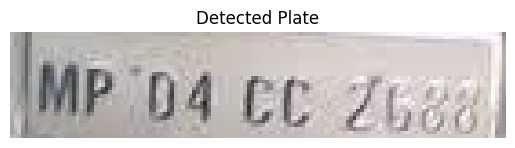

🔤 OCR Result: MP D4 CC 2688


'MP D4 CC 2688'

In [ ]:
detect_and_read_plate("/content/drive/MyDrive/Plates/img6.jpg")



In [ ]:
# ============================================================
# 📊 CHECK YOLOv11 ACCURACY (MAP, PRECISION, RECALL)
# ============================================================
results = model.val()

print("\n📌 VALIDATION METRICS:")
print(f"mAP50:       {results.box.map50:.4f}")
print(f"mAP50-95:    {results.box.map:.4f}")
print(f"Precision:   {results.box.mp:.4f}")
print(f"Recall:      {results.box.mr:.4f}")
print("\n✅ Accuracy Check Completed!")


Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 9.6±2.8 MB/s, size: 19.8 KB)
val: Scanning /content/drive/MyDrive/Dataset/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2048/2048 2.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 128/128 3.1it/s 41.8s
                   all       2048       2195      0.969      0.913      0.953      0.652
Speed: 0.9ms preprocess, 6.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /content/runs/detect/val

📌 VALIDATION METRICS:
mAP50:       0.9533
mAP50-95:    0.6520
Precision:   0.9686
Recall:      0.9125

✅ Accuracy Check Completed!


In [ ]:
from google.colab import files
files.download('runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()  # upload best.pt


Saving best.pt to best.pt


In [ ]:
from ultralytics import YOLO
model = YOLO("best.pt")
